## Discovering the best location for opening a new restaurant in Hong Kong Island

#### Importing all the required libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
 
 
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
 
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
 
 
! pip install folium==0.5.0
import folium # plotting library
 
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### List out all the parameters required for FourSquare API

In [2]:
CLIENT_ID = 'SIB1HHX3KY0MKB1MLAW0O1ATKYMWIEFRBNYABIC2WXJCY5RV' # your Foursquare ID
CLIENT_SECRET = 'EJZDHTTMN22S5EOSZYNXCCCETEEIXKKIKUVX3HZZR2QKAMJE' # your Foursquare Secret
ACCESS_TOKEN = 'NFL0J2F51ZXDGOXWCY0CKOVSNOSCTD00ZFJUHY3JDILAJF4Y' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SIB1HHX3KY0MKB1MLAW0O1ATKYMWIEFRBNYABIC2WXJCY5RV
CLIENT_SECRET:EJZDHTTMN22S5EOSZYNXCCCETEEIXKKIKUVX3HZZR2QKAMJE


#### Find out the latitude and longitude of Hong Kong Island

In [3]:
city = 'Hong Kong Island, Hong Kong'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(city)
hkI_latitude = location.latitude
hkI_longitude = location.longitude
print ('The latitude and longitude of Hong Kong Island are:', hkI_latitude, 'and', hkI_longitude)

The latitude and longitude of Hong Kong Island are: 22.2793278 and 114.1628131


#### Import a Hong Kong district dataframe obtained from wikipedia

In [4]:
hkdistrict18 = "https://en.wikipedia.org/wiki/Districts_of_Hong_Kong"

hkdistrict18_df=pd.read_html(hkdistrict18)
len(hkdistrict18_df)

14

In [5]:
hkdistrict18_df[6] #find out the table that show all the districts & region of Hong Kong

,District,Region,Chinese,Area(km2),Comparable Territory
0,Central and Western,Hong Kong Island,中西區,12.44,Tokelau (New Zealand)
1,Eastern,Hong Kong Island,東區,18.56,Nauru
2,Southern,Hong Kong Island,南區,38.85,Norfolk Island (Australia)
3,Wan Chai,Hong Kong Island,灣仔區,9.83,Tokelau (New Zealand)
4,Sham Shui Po,Kowloon,深水埗區,9.35,Tokelau (New Zealand)
5,Kowloon City,Kowloon,九龍城區,10.02,Tokelau (New Zealand)
6,Kwun Tong,Kowloon,觀塘區,11.27,Tokelau (New Zealand)
7,Wong Tai Sin,Kowloon,黃大仙區,9.30,Tokelau (New Zealand)
8,Yau Tsim Mong,Kowloon,油尖旺區,6.99,Gibraltar (United Kingdom)
9,Islands,New Territories,離島區,175.12,Aruba (Netherlands)


In [6]:
hkdistrict18_data=hkdistrict18_df[6] #assign a new table name

#since some of the district name is too general, an extra column is added to specify the address for foursquare search
hkdistrict18_data['geo_address']=hkdistrict18_data['District'].str.cat(hkdistrict18_data['Region'],sep= ",")

#drop unwanted columns
hkdistrict18_data1=hkdistrict18_data.drop(['Chinese', 'Area(km2)','Comparable Territory'], axis=1)

hkdistrict18_data1.head

<bound method NDFrame.head of                District            Region  \
0   Central and Western  Hong Kong Island   
1               Eastern  Hong Kong Island   
2              Southern  Hong Kong Island   
3              Wan Chai  Hong Kong Island   
4          Sham Shui Po           Kowloon   
5          Kowloon City           Kowloon   
6             Kwun Tong           Kowloon   
7          Wong Tai Sin           Kowloon   
8         Yau Tsim Mong           Kowloon   
9               Islands   New Territories   
10           Kwai Tsing   New Territories   
11                North   New Territories   
12             Sai Kung   New Territories   
13              Sha Tin   New Territories   
14               Tai Po   New Territories   
15            Tsuen Wan   New Territories   
16             Tuen Mun   New Territories   
17            Yuen Long   New Territories   

                             geo_address  
0   Central and Western,Hong Kong Island  
1               Eastern,Hong

### Let's focus on the Hong Kong Island Region

In [7]:
#identify the rows that applicable to Hong Kong Island Region
hkisland_df=hkdistrict18_data1.loc[hkdistrict18_data1['Region']=='Hong Kong Island']
hkisland_df

,District,Region,geo_address
0,Central and Western,Hong Kong Island,"Central and Western,Hong Kong Island"
1,Eastern,Hong Kong Island,"Eastern,Hong Kong Island"
2,Southern,Hong Kong Island,"Southern,Hong Kong Island"
3,Wan Chai,Hong Kong Island,"Wan Chai,Hong Kong Island"


### Visualize the 4 districts of Hong Kong Island on the Hong Kong map

In [8]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(address): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="foursquare_agent") 
          
        return geolocator.geocode(address) 
      
    except GeocoderTimedOut:
        
         return findGeocode(address)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (hkisland_df["geo_address"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [9]:
# Find out the latitude and longitude for the 4 districts of Hong Kong Island Region & create a new table by combining with the exisitng tableisting table
longitude1=pd.DataFrame(longitude)
longitude1.columns=['Longitude']
latitude=pd.DataFrame(latitude)
latitude.columns=['Latitude']


hkisland_df_final= pd.concat([hkisland_df,latitude, longitude1], axis=1)
hkisland_df_final

,District,Region,geo_address,Latitude,Longitude
0,Central and Western,Hong Kong Island,"Central and Western,Hong Kong Island",22.281829,114.158278
1,Eastern,Hong Kong Island,"Eastern,Hong Kong Island",22.283121,114.224180
2,Southern,Hong Kong Island,"Southern,Hong Kong Island",60.180277,24.910466
3,Wan Chai,Hong Kong Island,"Wan Chai,Hong Kong Island",22.279015,114.172483


#### The coordinate for Southern District is not align with the other 3 districts, for this i revised the coordinate (using Google) and replace the value in the dataframe

In [10]:
hkisland_df_final.iloc[2, hkisland_df_final.columns.get_loc('Latitude')] = 22.2432
hkisland_df_final.iloc[2, hkisland_df_final.columns.get_loc('Longitude')] = 114.1974
hkisland_df_final

,District,Region,geo_address,Latitude,Longitude
0,Central and Western,Hong Kong Island,"Central and Western,Hong Kong Island",22.281829,114.158278
1,Eastern,Hong Kong Island,"Eastern,Hong Kong Island",22.283121,114.224180
2,Southern,Hong Kong Island,"Southern,Hong Kong Island",22.243200,114.197400
3,Wan Chai,Hong Kong Island,"Wan Chai,Hong Kong Island",22.279015,114.172483


In [11]:
#visualise the 4 districts of the Hong Kong Island Region

map_hkisland4districts = folium.Map(location=[22.2793278,114.1628131],zoom_start=13)

for lat,lng,District,Region in zip(hkisland_df_final['Latitude'],hkisland_df_final['Longitude'],hkisland_df_final['District'],hkisland_df_final['Region']):
    label = '{}, {}'.format(District, Region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hkisland4districts)
    
map_hkisland4districts

#### Find out the venue categories and diversity of  each districts

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
CentralNWestern_latitude = hkisland_df_final.loc[0, 'Latitude'] # Chinese & western district latitude value
CentralNWestern_longitude = hkisland_df_final.loc[0, 'Longitude'] # Chinese & western district longitude value

District_name = hkisland_df_final.loc[0, 'District'] # District name

print('Latitude and longitude values of {} are {}, {}.'.format(District_name, 
                                                               CentralNWestern_latitude, 
                                                               CentralNWestern_longitude))

Latitude and longitude values of Central and Western are 22.2818286, 114.1582784.


In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 2000 # define radius

# creatURL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    CentralNWestern_latitude, 
    CentralNWestern_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIB1HHX3KY0MKB1MLAW0O1ATKYMWIEFRBNYABIC2WXJCY5RV&client_secret=EJZDHTTMN22S5EOSZYNXCCCETEEIXKKIKUVX3HZZR2QKAMJE&v=20180604&ll=22.2818286,114.1582784&radius=2000&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd7eabce08ec61add58073e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central and Western District',
  'headerFullLocation': 'Central and Western District, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 22.299828618000017,
    'lng': 114.1776946186282},
   'sw': {'lat': 22.263828581999984, 'lng': 114.1388621813718}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c7fa26501df37045bb4e6ac',
       'name': 'Mandarin Grill + Bar (文華扒房＋酒吧)',
       'location': {'address': '1/F, Mandarin Oriental Hong Kong, 5 Connaught Road Central, Central',
        'lat': 22.281928,
     

#### While researching online, I found a much simplier python package that can retrieve the foursquare APIs, all you have to do is put in the lat and lng parameter

In [16]:
!pip install foursquare

!pip install git+https://github.com/dacog/foursquare_api_tools.git#egg=foursquare_api_tools

import foursquare as fs
from foursquare_api_tools import foursquare_api_tools as ft

In [17]:
client = fs.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, version=VERSION)

In [18]:
southern_df=ft.venues_explore(client,lat='22.243200',lng='114.197400',limit=100)

southern_df['District']='Southern'
southern_df

,index,Name,City,Latitude,Longitude,Category,Address,Country,District
0,0,Repulse Bay Beach (淺水灣泳灘),Repulse Bay,22.236858,114.196139,Beach,Beach Rd,香港,Southern
1,0,The Repulse Bay (影灣園),Repulse Bay,22.238568,114.195695,Housing Development,109 Repulse Bay Rd,香港,Southern
2,0,Market Place by Jasons,Repulse Bay,22.239129,114.195530,Supermarket,"Shop G128, The Repulse Bay Arcade, 109 Repulse...",香港,Southern
3,0,Violet Hill (紫羅蘭山),Tai Tam,22.249089,114.200116,Mountain,,香港,Southern
4,0,Spices (香辣軒),香港,22.238714,114.195965,Asian Restaurant,"G/F, The Repulse Bay, 109 Repulse Bay Rd",香港,Southern
5,0,The Verandah,Repulse Bay,22.238814,114.195683,Restaurant,109 Repulse Bay Rd,香港,Southern
6,0,Amalfitana Artisan Pizza Bar,Repulse Bay,22.236413,114.197461,Pizza Place,"The Pulse, G/F, Shop 105, 28 Beach Rd",香港,Southern
7,0,The Pulse,Repulse Bay,22.236045,114.197858,Shopping Mall,28 Beach Rd,香港,Southern
8,0,The Hong Kong Golf Club (香港高爾夫球會),Deep Water Bay,22.246219,114.186608,Golf Course,19 Island Rd,香港,Southern
9,0,Limewood,Repulse Bay,22.236512,114.197393,Seafood Restaurant,"Shop 103 & 104, G/F, the pulse, 28 Beach Rd",香港,Southern


In [19]:
print('There are {} uniques categories.'.format(len(southern_df['Category'].unique())))

There are 32 uniques categories.


In [20]:
eastern_df=ft.venues_explore(client,lat='22.283121',lng='114.224180',limit=100)

eastern_df['District']='Eastern'
eastern_df

,index,Name,City,Latitude,Longitude,Category,Address,Country,District
0,0,Ashoka Indian Restaurant (皇子印度餐廳),Sai Wan Ho,22.280257,114.224753,Indian Restaurant,240 Shau Kei Wan Rd,香港,Eastern
1,0,Master Low-key Food Shop (低調高手大街小食),香港,22.279212,114.229606,Snack Place,"Shop B3, 76A Shau Kei Wan Main St E",香港,Eastern
2,0,The Eslite Spectrum (誠品生活),太古城,22.286110,114.218512,Bookstore,"Shop 74, G/F and Shop 144, 1/F, Cityplaza, 18 ...",香港,Eastern
3,0,Little Kitchen,香港,22.281781,114.221516,French Restaurant,"112-114 Cheung Lok Building, Sai Wan Ho Street",香港,Eastern
4,0,海南雞專門店,Sai Wan Ho,22.283032,114.221937,Hainan Restaurant,"Shop A32B, G/F, Tai On Building, 57-87 Shau Ke...",香港,Eastern
...,...,...,...,...,...,...,...,...,...
95,0,Mian 壹碗麵 (壹碗麵),香港,22.286317,114.211654,Noodle House,48 Pan Hoi St,香港,Eastern
96,0,simplylife,鰂魚涌,22.287868,114.211339,Café,"G/F, Dorset House, Taikoo Place, 979 King's Rd",香港,Eastern
97,0,Hoi Yat Heen (海逸軒),北角,22.291628,114.208425,Chinese Restaurant,"3/F, Harbour Plaza North Point, 665 King's Rd",香港,Eastern
98,0,McDonald’s (麥當勞),香港,22.275755,114.240872,Fast Food Restaurant,"Shop G46, G/F, Paradise Mall, Heng Fa Chuen, 1...",香港,Eastern


In [21]:
wanchai_df=ft.venues_explore(client,lat='22.279015',lng='114.172483',limit=100)
wanchai_df['District']='Wan Chai'
wanchai_df

,index,Name,City,Latitude,Longitude,Category,Address,Country,District
0,0,Grand Hyatt Hong Kong (香港君悅酒店),灣仔,22.280963,114.171673,Hotel,1 Harbour Rd,香港,Wan Chai
1,0,Sang Kee Seafood Restaurant (生記海鮮飯店),灣仔,22.277755,114.172093,Seafood Restaurant,"1-2/F, Hip Sang Bldg, 107-115 Hennessy Rd",香港,Wan Chai
2,0,Grand Café,灣仔,22.281452,114.171979,Café,"G/F, Grand Hyatt Hong Kong, 1 Harbour Rd",香港,Wan Chai
3,0,One Harbour Road (港灣壹號),灣仔,22.281462,114.171932,Chinese Restaurant,"Grand Hyatt Hong Kong, 1 Harbour Rd",香港,Wan Chai
4,0,Hong Kong Academy for Performing Arts (香港演藝學院),灣仔,22.280073,114.169581,Performing Arts Venue,1 Gloucester Rd,香港,Wan Chai
...,...,...,...,...,...,...,...,...,...
95,0,Shari Shari Kakigori House (氷屋),铜锣湾,22.277981,114.186702,Dessert Shop,"G/F, 14 Haven St",香港,Wan Chai
96,0,The Mandarin Cake Shop,中環,22.281959,114.159416,Bakery,"M/F, Mandarin Oriental Hong Kong, 5 Connaught ...",香港,Wan Chai
97,0,Kong Chai Kee (江仔記),铜锣湾,22.278898,114.181413,Noodle House,2 Canal Rd E,香港,Wan Chai
98,0,Din Tai Fung (鼎泰豐),铜锣湾,22.279036,114.186185,Dumpling Restaurant,68 Yee Wo St,香港,Wan Chai


In [22]:
central_western_df=ft.venues_explore(client,lat='22.281829',lng='114.158278',limit=100)
central_western_df['District']='Central & Western'
central_western_df


,index,Name,City,Latitude,Longitude,Category,Address,Country,District
0,0,Mandarin Grill + Bar (文華扒房＋酒吧),中環,22.281928,114.159408,Steakhouse,"1/F, Mandarin Oriental Hong Kong, 5 Connaught ...",香港,Central & Western
1,0,Mandarin Oriental Hong Kong (香港文華東方酒店),中環,22.281857,114.159382,Hotel,"5 Connaught Road, Central",香港,Central & Western
2,0,Mott 32 (卅二公館),香港,22.280286,114.159080,Dim Sum Restaurant,"B/F, Standard Chartered Bank Building, 4-4A De...",香港,Central & Western
3,0,8½ Otto e Mezzo Bombana,中環,22.281726,114.158767,Italian Restaurant,"Unit 202, 2/F, Alexandra House, 18 Chater Rd",香港,Central & Western
4,0,Sift Patisserie,中環,22.280922,114.159885,Cupcake Shop,"Shop 240-241, Prince's Bldg, 10 Chater Rd",香港,Central & Western
...,...,...,...,...,...,...,...,...,...
95,0,Craftissimo,Sheung Wan,22.284589,114.148293,Beer Store,22-24 Tai Ping Shan Rd,香港,Central & Western
96,0,Soho Banh Mi,中環,22.280951,114.151485,Vietnamese Restaurant,8 Rednaxela Terrace,香港,Central & Western
97,0,Mammy Pancake (媽咪雞蛋仔),香港,22.285685,114.151850,Snack Place,32 Bonham Strand W,香港,Central & Western
98,0,Yardbird,香港,22.287076,114.149177,Japanese Restaurant,154-158 Wing Lok Street,香港,Central & Western


In [23]:
print('There are {} uniques categories in Southern District.'.format(len(southern_df['Category'].unique())))
print('There are {} uniques categories in Eastern District.'.format(len(eastern_df['Category'].unique())))
print('There are {} uniques categories in Wan Chai District.'.format(len(wanchai_df['Category'].unique())))
print('There are {} uniques categories in Central & Western District.'.format(len(central_western_df['Category'].unique())))

There are 32 uniques categories in Southern District.
There are 55 uniques categories in Eastern District.
There are 55 uniques categories in Wan Chai District.
There are 60 uniques categories in Central & Western District.


### Lets generate some word clouds for the venue categories and see the frequency visually

In [24]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords=set(STOPWORDS)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=4,
        random_state=0 #chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

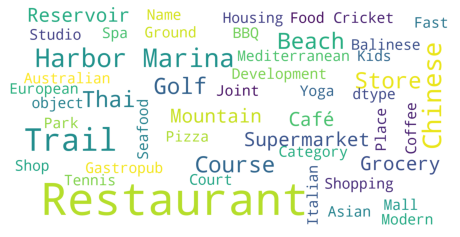

In [25]:
show_wordcloud(southern_df['Category'])

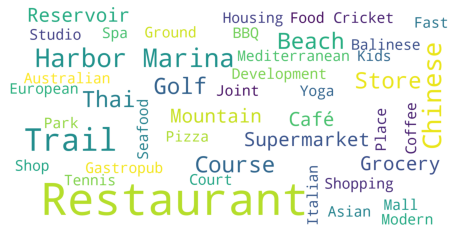

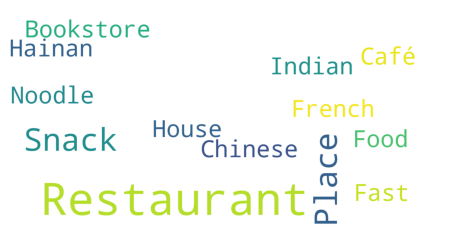

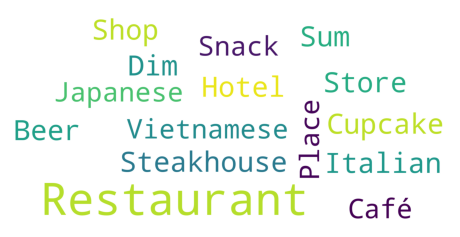

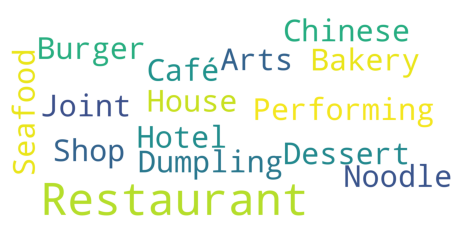

In [26]:
stopwords.add('dtype')
stopwords.add('Name')
stopwords.add('object')
stopwords.add('Venue')
stopwords.add('Length')
stopwords.add('Category')

show_wordcloud(southern_df['Category'])
show_wordcloud(eastern_df['Category'])
show_wordcloud(central_western_df['Category'])
show_wordcloud(wanchai_df['Category'])

#### Lets repeat the FourSquare API process and focus on 'Restaurant' this time

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 2000 # define radius

categoryId='4bf58dd8d48988d111941735'

HKI_latitude= 22.2588

HKI_longitude=114.1911

# creatURL
HKI_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    categoryId,
    22.281829,
    114.158278,
    radius, 
    LIMIT)

HKI_url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=SIB1HHX3KY0MKB1MLAW0O1ATKYMWIEFRBNYABIC2WXJCY5RV&client_secret=EJZDHTTMN22S5EOSZYNXCCCETEEIXKKIKUVX3HZZR2QKAMJE&v=20180604&categoryId=4bf58dd8d48988d111941735&ll=22.281829,114.158278&radius=2000&limit=100'

In [28]:
results = requests.get(HKI_url).json()
results

{'meta': {'code': 200, 'requestId': '5fd7ead920255f5eb0865069'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central and Western District',
  'headerFullLocation': 'Central and Western District, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'query': 'japanese',
  'totalResults': 174,
  'suggestedBounds': {'ne': {'lat': 22.299829018000015,
    'lng': 114.17769421868373},
   'sw': {'lat': 22.263828981999982, 'lng': 114.13886178131627}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0e380af964a520115623e3',
       'name': 'Zuma',
       'location': {'address': "5-6/F, The Landmark, 13 Queen's Rd C",
        'crossStreet': 'at Ice House St',
        'lat': 22.280

#### Lets create a new Hong Kong Island Restaurant dataframe by combing the 4 district tables and filter the Column 'Category' with the word 'Restaurant'

In [29]:
HKI_restaurant_df= pd.concat([southern_df, eastern_df, central_western_df,wanchai_df])

HKI_restaurant_df=HKI_restaurant_df[HKI_restaurant_df['Category'].str.contains("Restaurant")]

HKI_restaurant_df

,index,Name,City,Latitude,Longitude,Category,Address,Country,District
4,0,Spices (香辣軒),香港,22.238714,114.195965,Asian Restaurant,"G/F, The Repulse Bay, 109 Repulse Bay Rd",香港,Southern
5,0,The Verandah,Repulse Bay,22.238814,114.195683,Restaurant,109 Repulse Bay Rd,香港,Southern
9,0,Limewood,Repulse Bay,22.236512,114.197393,Seafood Restaurant,"Shop 103 & 104, G/F, the pulse, 28 Beach Rd",香港,Southern
16,0,Meen & Rice (粥粉麵飯),Repulse Bay,22.235463,114.198069,Chinese Restaurant,"Shop 113, 1/F, The Pulse, 28 Beach Rd",香港,Southern
18,0,Ming Yuen (明園),Tai Tam,22.258000,114.199264,Chinese Restaurant,"Hong Kong Parkview, 88 Tai Tam Reservoir Rd",香港,Southern
...,...,...,...,...,...,...,...,...,...
91,0,Giando,香港,22.277060,114.167766,Italian Restaurant,"Shop 1, G/F, Tower 1, Starcrest, 9 Star St",香港,Wan Chai
92,0,Mott 32 (卅二公館),香港,22.280286,114.159080,Dim Sum Restaurant,"B/F, Standard Chartered Bank Building, 4-4A De...",香港,Wan Chai
93,0,Ginza Kuraudo (銀座藏人),灣仔,22.278187,114.170966,Japanese Restaurant,"1/F, The Wharney Guang Dong Hotel, 57-73 Lockh...",香港,Wan Chai
94,0,Trusty Congee King (靠得住粥麵小館),香港,22.277550,114.177180,Chinese Restaurant,"G/F, 7 Heard St",香港,Wan Chai


#### Lets visualize all these restaurants (from FourSquare API) on the Hong Kong Island Map

In [30]:
map_HKIrestaurants = folium.Map(location=[22.2793278,114.1628131], zoom_start=12)

# add markers to map
for lat, lng, District, City in zip(HKI_restaurant_df['Latitude'], HKI_restaurant_df['Longitude'], HKI_restaurant_df['District'], HKI_restaurant_df['City']):
    label = '{}, {}'.format(District, City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HKIrestaurants)  
    
map_HKIrestaurants

#### Lets analyze each of the 4 districts

In [31]:
# one hot encoding
restaurant1_onehot = pd.get_dummies(HKI_restaurant_df[['Category']], prefix="", prefix_sep="")

restaurant1_onehot['District'] = HKI_restaurant_df['District'] 

# move neighborhood column to the first column
fixed_columns = [restaurant1_onehot.columns[-1]] + list(restaurant1_onehot.columns[:-1])
restaurant1_onehot = restaurant1_onehot[fixed_columns]

restaurant1_onehot

,District,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Beijing Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,...,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Zhejiang Restaurant
4,Southern,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Southern,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,Southern,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16,Southern,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Southern,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Wan Chai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Wan Chai,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,Wan Chai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,Wan Chai,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


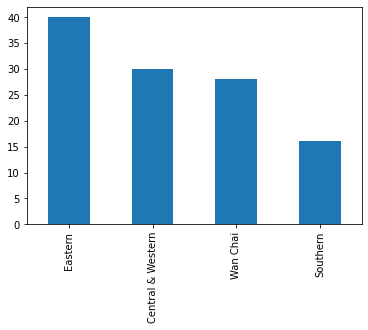

In [32]:
restaurant1_onehot['District'].value_counts().plot(kind='bar')

In [33]:
restaurant1_grouped = restaurant1_onehot.groupby('District').mean().reset_index()
restaurant1_grouped

,District,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Beijing Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,...,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Zhejiang Restaurant
0,Central & Western,0.033333,0.0000,0.0000,0.000,0.033333,0.100000,0.066667,0.033333,0.033333,...,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000
1,Eastern,0.000000,0.0000,0.0000,0.025,0.000000,0.050000,0.200000,0.025000,0.000000,...,0.025000,0.000000,0.125000,0.000000,0.050000,0.025000,0.025000,0.025000,0.025000,0.000000
2,Southern,0.062500,0.0625,0.0625,0.000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.000000
3,Wan Chai,0.000000,0.0000,0.0000,0.000,0.000000,0.035714,0.142857,0.035714,0.035714,...,0.000000,0.000000,0.035714,0.035714,0.035714,0.035714,0.071429,0.035714,0.035714,0.035714


In [34]:
num_top_venues = 5

for hood in restaurant1_grouped['District']:
    print("----"+hood+"----")
    temp = restaurant1_grouped[restaurant1_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central & Western----
                  venue  freq
0   Japanese Restaurant  0.17
1    Italian Restaurant  0.13
2  Cantonese Restaurant  0.10
3    Chinese Restaurant  0.07
4       Thai Restaurant  0.07


----Eastern----
                 venue  freq
0   Chinese Restaurant  0.20
1  Japanese Restaurant  0.12
2   Seafood Restaurant  0.12
3    French Restaurant  0.08
4    Korean Restaurant  0.05


----Southern----
                      venue  freq
0        Chinese Restaurant  0.25
1           Thai Restaurant  0.19
2          Asian Restaurant  0.06
3       Balinese Restaurant  0.06
4  Mediterranean Restaurant  0.06


----Wan Chai----
                 venue  freq
0   Chinese Restaurant  0.14
1  Japanese Restaurant  0.14
2   Italian Restaurant  0.14
3      Thai Restaurant  0.07
4    Korean Restaurant  0.04




#### Top 5 common venues of the 4 districts

In [35]:
num_top_venues = 5


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = restaurant1_grouped['District']

for ind in np.arange(restaurant1_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(restaurant1_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central & Western,Japanese Restaurant,Italian Restaurant,Cantonese Restaurant,Thai Restaurant,Chinese Restaurant
1,Eastern,Chinese Restaurant,Japanese Restaurant,Seafood Restaurant,French Restaurant,Cantonese Restaurant
2,Southern,Chinese Restaurant,Thai Restaurant,Restaurant,Italian Restaurant,Mediterranean Restaurant
3,Wan Chai,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Thai Restaurant,Middle Eastern Restaurant


### When I try to use K-means clustering, I realised 4 districts are not enough so I have decided to rework the restaurant dataframe and add in a new column 'Neighborhood' so that we can divide our data in a deeper level

#### I exported the original *HKI_restaurant_df* dataframe and modified the data before importing the csv back to JupyterLab

In [38]:
HKI_restaurant_df.to_excel(r'C:\Users\ASUS\Downloads\HKI_restaurante.xlsx', index = False)

In [39]:
HKI_restaurant_revised=pd.read_csv(r'C:\Users\ASUS\Downloads\HKIrestaurantAPI_category.csv')
HKI_restaurant_revised.head()

,District,Neighborhood,Category,Name,Latitude,Longitude,Address
0,Central & Western,Central,Asian Restaurant,Brass Spoon,22.283329,114.156093,"G/F, 10 Pottinger St"
1,Central & Western,Central,Brazilian Restaurant,Uma Nota,22.282673,114.152817,38 Peel Street
2,Central & Western,Central,Chinese Restaurant,Mott 32 (卅二公館),22.280286,114.159080,"B/F, Standard Chartered Bank Building, 4-4A De..."
3,Central & Western,Central,Chinese Restaurant,Man Wah (文華廳),22.281993,114.159242,"25/F, Mandarin Oriental Hong Kong, 5 Connaught..."
4,Central & Western,Central,Chinese Restaurant,Howard's Gourmet (好酒好蔡),22.281469,114.161404,"5/F, CCB Tower, 3 Connaught Road Central"


In [40]:
HKI_restaurant_revised.groupby('Neighborhood').count()
HKI_restaurant_revised.drop(['District'], axis=1)
HKI_restaurant_revised

,District,Neighborhood,Category,Name,Latitude,Longitude,Address
0,Central & Western,Central,Asian Restaurant,Brass Spoon,22.283329,114.156093,"G/F, 10 Pottinger St"
1,Central & Western,Central,Brazilian Restaurant,Uma Nota,22.282673,114.152817,38 Peel Street
2,Central & Western,Central,Chinese Restaurant,Mott 32 (卅二公館),22.280286,114.159080,"B/F, Standard Chartered Bank Building, 4-4A De..."
3,Central & Western,Central,Chinese Restaurant,Man Wah (文華廳),22.281993,114.159242,"25/F, Mandarin Oriental Hong Kong, 5 Connaught..."
4,Central & Western,Central,Chinese Restaurant,Howard's Gourmet (好酒好蔡),22.281469,114.161404,"5/F, CCB Tower, 3 Connaught Road Central"
...,...,...,...,...,...,...,...
109,Wan Chai,Wan Chai,Spanish Restaurant,The Optimist,22.278049,114.175854,"G/F-2/F, 239 Hennessy Rd"
110,Wan Chai,Wan Chai,Taiwanese Restaurant,1963木十豆寸,22.277020,114.175386,"2/F, Chung Wui Mansion, 106-114 Wan Chai Rd"
111,Wan Chai,Wan Chai,Thai Restaurant,Samsen (泰麵),22.274023,114.174000,"G/F, 68 Stone Nullah Ln"
112,Wan Chai,Wan Chai,Thai Restaurant,The Spice House,22.276187,114.172174,35 Amoy St


In [41]:
print('There are {} uniques categories.'.format(len(HKI_restaurant_revised['Category'].unique())))

There are 27 uniques categories.


#### Analyze Each Neighbohood

In [42]:
# one hot encoding
HKI_restaurant_revised_onehot = pd.get_dummies(HKI_restaurant_revised[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HKI_restaurant_revised_onehot['Neighborhood'] = HKI_restaurant_revised['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [HKI_restaurant_revised_onehot.columns[-1]] + list(HKI_restaurant_revised_onehot.columns[:-1])
HKI_restaurant_revised_onehot = HKI_restaurant_revised_onehot[fixed_columns]

HKI_restaurant_revised_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,...,Pakistani Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Taiwanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Central,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
HKI_restaurant_revised_onehot.shape

(114, 28)

#### Group rows by neighborhood & by taking the mean of the frequency of occurrence of each category

In [44]:
HKI_restaurant_revised_grouped = HKI_restaurant_revised_onehot.groupby('Neighborhood').mean().reset_index()
HKI_restaurant_revised_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,...,Pakistani Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Taiwanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Admiralty,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Causeway Bay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
2,Central,0.000000,0.033333,0.000000,0.000000,0.033333,0.300000,0.0,0.066667,0.000000,...,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333
3,Chai Wan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Deep Water Bay,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.2,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
5,Lei Yue Mun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North Point,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Quarry Bay,0.071429,0.000000,0.000000,0.000000,0.000000,0.285714,0.0,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.071429,0.071429,0.000000
8,Repulse Bay,0.000000,0.111111,0.111111,0.111111,0.000000,0.222222,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000
9,Sai Wan Ho,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.0,0.142857,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
HKI_restaurant_revised_onehot_drop=HKI_restaurant_revised_onehot.drop('Neighborhood',axis=1)
HKI_restaurant_revised_onehot_drop

,American Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,Hawaiian Restaurant,...,Pakistani Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Taiwanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Each neighborhood along with the top 5 most common venues

In [46]:
num_top_venues = 5

for hood in HKI_restaurant_revised_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HKI_restaurant_revised_grouped[HKI_restaurant_revised_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Admiralty----
                           venue  freq
0             Chinese Restaurant   1.0
1            American Restaurant   0.0
2       Mediterranean Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4                Thai Restaurant   0.0


----Causeway Bay----
                           venue  freq
0          Vietnamese Restaurant  0.33
1           Taiwanese Restaurant  0.33
2            Japanese Restaurant  0.33
3       Mediterranean Restaurant  0.00
4  Vegetarian / Vegan Restaurant  0.00


----Central----
                 venue  freq
0   Chinese Restaurant  0.30
1   Italian Restaurant  0.17
2  Japanese Restaurant  0.13
3      Thai Restaurant  0.07
4    French Restaurant  0.07


----Chai Wan----
                           venue  freq
0           Fast Food Restaurant   1.0
1            American Restaurant   0.0
2       Mediterranean Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4                Thai Restaurant   0.0


----Deep Water Bay----
                     

#### Write a function to sort the venues in descending order

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Displaying the top 10 restaurant category for each neighborhood

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HKI_restaurant_revised_grouped['Neighborhood']

for ind in np.arange(HKI_restaurant_revised_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HKI_restaurant_revised_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralty,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
1,Causeway Bay,Vietnamese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
2,Central,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
3,Chai Wan,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,French Restaurant,Hainan Restaurant
4,Deep Water Bay,Thai Restaurant,Chinese Restaurant,Fast Food Restaurant,Modern European Restaurant,Vietnamese Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant
5,Lei Yue Mun,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
6,North Point,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
7,Quarry Bay,Chinese Restaurant,Japanese Restaurant,Korean Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Thai Restaurant,Seafood Restaurant,Taiwanese Restaurant,Scandinavian Restaurant
8,Repulse Bay,Chinese Restaurant,Italian Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Seafood Restaurant,Balinese Restaurant,Modern European Restaurant,Vietnamese Restaurant,Brazilian Restaurant
9,Sai Wan Ho,Chinese Restaurant,French Restaurant,Hainan Restaurant,Modern European Restaurant,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant


## Cluster Neighhorhoods

In [49]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(HKI_restaurant_revised_onehot_drop)
    Sum_of_squared_distances.append(km.inertia_)

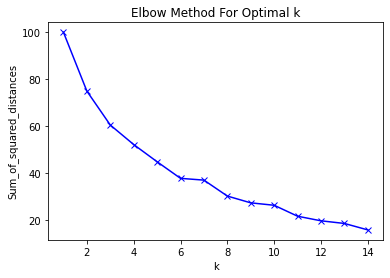

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### According to the elbow method, the optimal K for Hong Kong Island Restaurant K means is 7.

### Run k-means to cluster the neighborhood into 5 clusters

In [51]:
# set number of clusters
kclusters = 7

HKI_restaurant_revised_grouped_clustering = HKI_restaurant_revised_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HKI_restaurant_revised_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 6, 2, 3, 2, 1, 4, 2, 2, 2])

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster labels', kmeans.labels_)

HKIsland_merged = HKI_restaurant_revised

# merge HKIsland_grouped with HKI_restaurant_revised to add latitude/longitude for each neighborhood
HKIsland_merged = HKIsland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

HKIsland_merged.head() # check the last columns!

,District,Neighborhood,Category,Name,Latitude,Longitude,Address,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central & Western,Central,Asian Restaurant,Brass Spoon,22.283329,114.156093,"G/F, 10 Pottinger St",2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
1,Central & Western,Central,Brazilian Restaurant,Uma Nota,22.282673,114.152817,38 Peel Street,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
2,Central & Western,Central,Chinese Restaurant,Mott 32 (卅二公館),22.280286,114.159080,"B/F, Standard Chartered Bank Building, 4-4A De...",2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
3,Central & Western,Central,Chinese Restaurant,Man Wah (文華廳),22.281993,114.159242,"25/F, Mandarin Oriental Hong Kong, 5 Connaught...",2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
4,Central & Western,Central,Chinese Restaurant,Howard's Gourmet (好酒好蔡),22.281469,114.161404,"5/F, CCB Tower, 3 Connaught Road Central",2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[hkI_latitude, hkI_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HKIsland_merged['Latitude'], HKIsland_merged['Longitude'], HKIsland_merged['Neighborhood'], HKIsland_merged['Cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine each cluster

In [54]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 0, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Tai Tam,0,Chinese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant
88,Tai Tam,0,Chinese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant


In [55]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 1, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Lei Yue Mun,1,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
35,Lei Yue Mun,1,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
36,Lei Yue Mun,1,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
72,Yau Tong,1,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant


In [56]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 2, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
1,Central,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
2,Central,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
3,Central,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
4,Central,2,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Hawaiian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Wan Chai,2,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Thai Restaurant,Korean Restaurant,Middle Eastern Restaurant,Taiwanese Restaurant,Spanish Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
110,Wan Chai,2,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Thai Restaurant,Korean Restaurant,Middle Eastern Restaurant,Taiwanese Restaurant,Spanish Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
111,Wan Chai,2,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Thai Restaurant,Korean Restaurant,Middle Eastern Restaurant,Taiwanese Restaurant,Spanish Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
112,Wan Chai,2,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Thai Restaurant,Korean Restaurant,Middle Eastern Restaurant,Taiwanese Restaurant,Spanish Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant


In [57]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 3, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Chai Wan,3,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,French Restaurant,Hainan Restaurant


In [58]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 4, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,North Point,4,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
59,Shau Kei Wan,4,Chinese Restaurant,Hainan Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant
60,Shau Kei Wan,4,Chinese Restaurant,Hainan Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant
61,Shau Kei Wan,4,Chinese Restaurant,Hainan Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant
89,Admiralty,4,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant


In [59]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 5, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Sheung Wan,5,Seafood Restaurant,Scandinavian Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant
31,Sheung Wan,5,Seafood Restaurant,Scandinavian Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant
32,Sheung Wan,5,Seafood Restaurant,Scandinavian Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant


In [60]:
HKIsland_merged.loc[HKIsland_merged['Cluster labels'] == 6, HKIsland_merged.columns[[1] + list(range(7, HKIsland_merged.shape[1]))]]

,Neighborhood,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Causeway Bay,6,Vietnamese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
91,Causeway Bay,6,Vietnamese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant
92,Causeway Bay,6,Vietnamese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Asian Restaurant,Australian Restaurant,Balinese Restaurant,Brazilian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant


### Food service business receipts indices bar chart

In [86]:
data = {'Years':  ['2017', '2018','2019','2020'],
        'Business receipts indices': ['108.1', '114.6','107.8','76.5']
         
        }

food_service= pd.DataFrame (data, columns = ['Years','Business receipts indices'])

food_service.astype(float)

food_service.dtypes

Years                        object
Business receipts indices    object
dtype: object

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt

food_service["Years"]= food_service.Years.astype(int)
food_service["Business receipts indices"]=food_service["Business receipts indices"].astype(float)

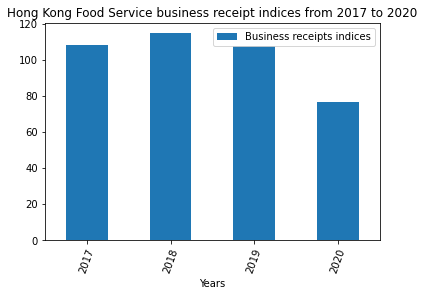

In [104]:
food_service.plot.bar(x="Years", y="Business receipts indices", rot=70,title ="Hong Kong Food Service business receipt indices from 2017 to 2020")

### Chinese Restaurant receipt value from 2017 to 2020 line graph

In [27]:
# List1  
List_CR = [['2017', 105.4], ['2018', 110.4], 
       ['2019', 99.3], ['2019 7-9', 90.5],['2019 10-12', 89.1], ['2020 1-3', 73.5], 
       ['2020 4-6', 72.1], ['2020 7-9', 59.0] ]
    
C_restaurant = pd.DataFrame(List_CR, columns =['Years', 'Receipt value']) 
C_restaurant

,Years,Receipt value
0,2017,105.4
1,2018,110.4
2,2019,99.3
3,2019 7-9,90.5
4,2019 10-12,89.1
5,2020 1-3,73.5
6,2020 4-6,72.1
7,2020 7-9,59.0


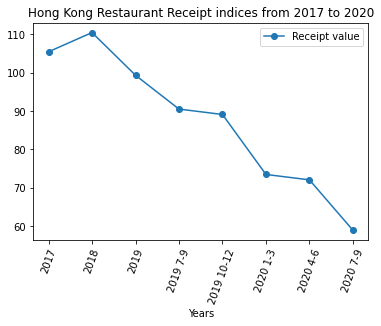

In [28]:
C_restaurant.plot(x='Years', y='Receipt value',rot=70, marker = 'o', title='Hong Kong Restaurant Receipt indices from 2017 to 2020')
